## 12.1 Matplotlib 入門

In [1]:
# Jupiter Notebook 要加這一個指令
%matplotlib inline

## 12.2 Matplotlib 的物件導向指南

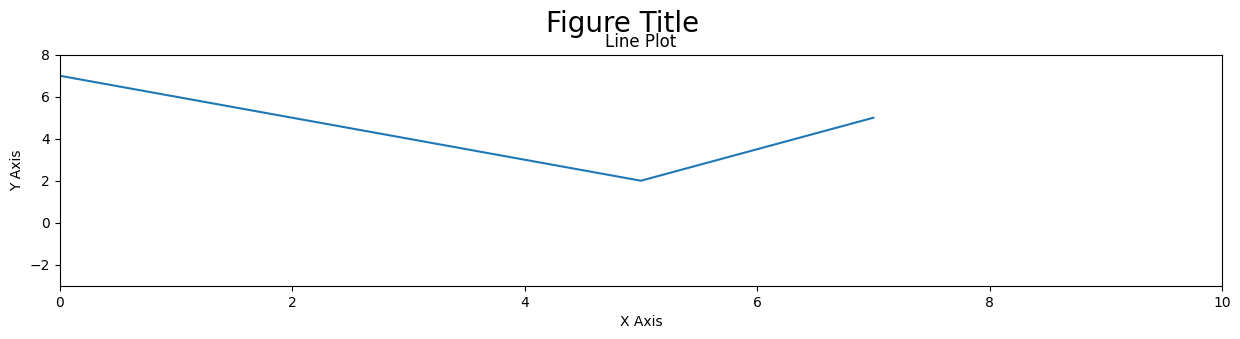

In [3]:
# stateful
import matplotlib.pyplot as plt
x = [-3, 5, 7]
y = [10, 2, 5]
fig = plt.figure(figsize=(15,3))
plt.plot(x, y)
plt.xlim(0, 10)
plt.ylim(-3, 8)
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Line Plot')
plt.suptitle('Figure Title', size=20, y=1.03);

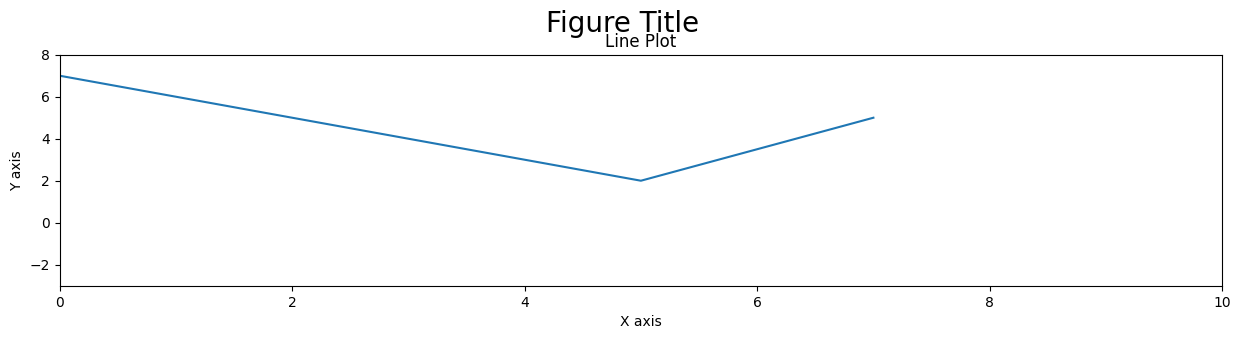

In [7]:
# object-oriented
from matplotlib.figure import Figure
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from IPython.display import display
fig = Figure(figsize=(15, 3))
FigureCanvas(fig)
ax = fig.add_subplot(1,1,1)

ax.plot(x, y)
ax.set_xlim(0, 10)
ax.set_ylim(-3, 8)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_title('Line Plot')
fig.suptitle('Figure Title', size=20, y=1.03)
display(fig)

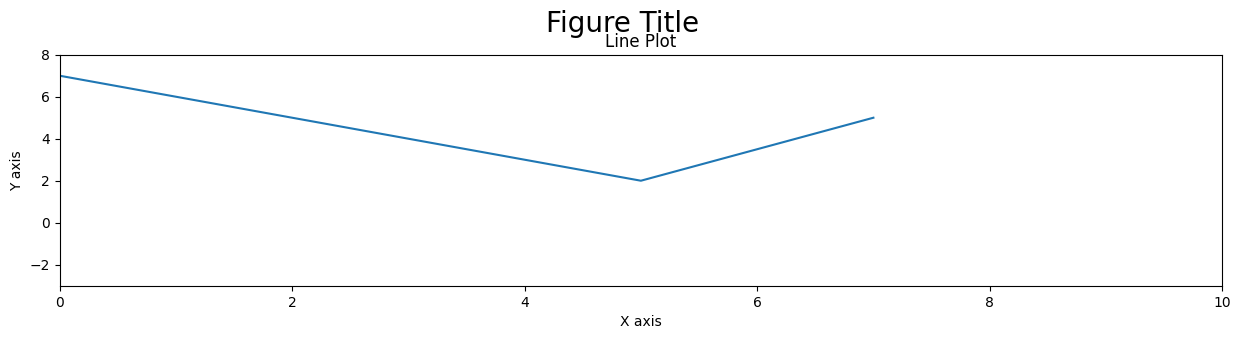

In [9]:
# 混合用法
fig, ax = plt.subplots(figsize=(15,3))
ax.plot(x,y)
ax.set(xlim=(0,10), ylim=(-3, 8),
       xlabel='X axis', ylabel='Y axis',
       title='Line Plot')
fig.suptitle('Figure Title', size=20, y=1.03);

In [1]:
# 匯入套件
import matplotlib.pyplot as plt

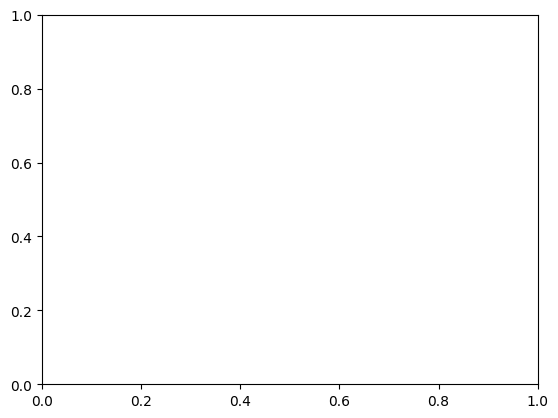

In [2]:
# 建立1X1 網格的圖
fig, ax = plt.subplots(nrows=1, ncols=1)

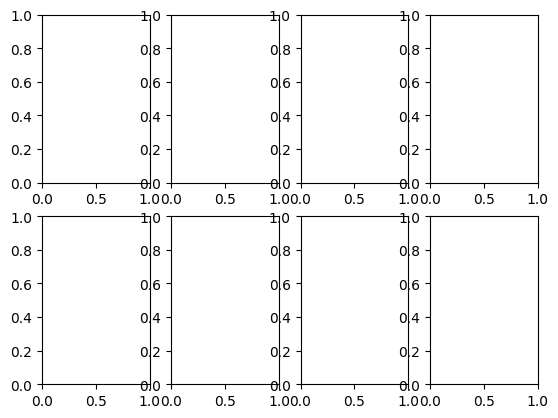

In [5]:
# 建立2X4 網格
fig, ax = plt.subplots(2, 4)

[6.4 4.8]


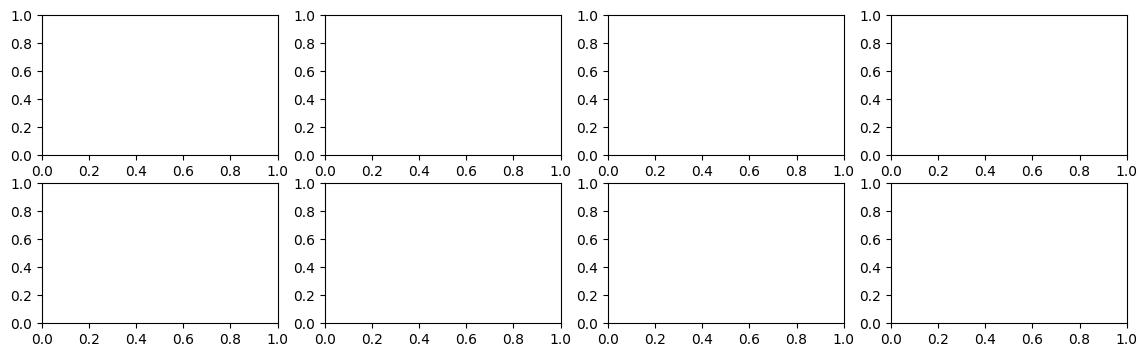

In [6]:
# 取得並修改fig 大小
print(fig.get_size_inches())

fig.set_size_inches(14,4)
fig

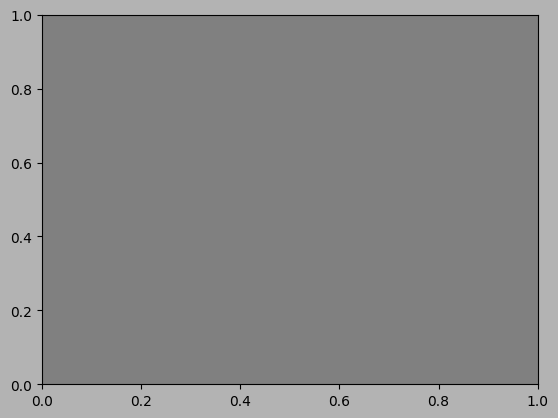

In [3]:
# 了解fig ax 的不同
fig.set_facecolor('.7')
ax.set_facecolor('.5')
fig

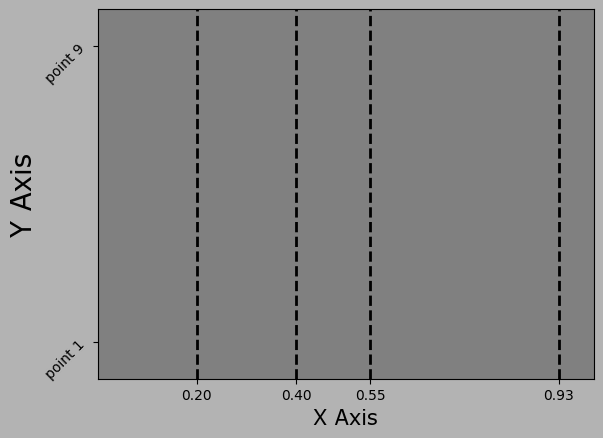

In [6]:
# 試著修改axis
ax.xaxis.grid(True, which='major', linewidth=2, color='black', linestyle='--')

ax.xaxis.set_ticks([.2, .4, .55, .93])

ax.xaxis.set_label_text('X Axis', family='Verdana', fontsize=15)
ax.set_ylabel('Y Axis',family='Verdana', fontsize=20)
ax.set_yticks([.1, .9])
ax.set_yticklabels(['point 1' , 'point 9'], rotation=45)
fig

In [7]:
# 查看axis物件的特性列表
ax.xaxis.properties()

{'agg_filter': None,
 'alpha': None,
 'animated': False,
 'children': [Text(0.5, 23.52222222222222, 'X Axis'),
  Text(1, 24.911111111111108, ''),
 'clip_box': <matplotlib.transforms.TransformedBbox at 0x27a7fa9afd0>,
 'clip_on': True,
 'clip_path': None,
 'converter': None,
 'data_interval': array([ inf, -inf]),
 'figure': <Figure size 640x480 with 1 Axes>,
 'gid': None,
 'gridlines': <a list of 4 Line2D gridline objects>,
 'in_layout': True,
 'inverted': np.False_,
 'label': Text(0.5, 23.52222222222222, 'X Axis'),
 'label_position': 'bottom',
 'label_text': 'X Axis',
 'major_formatter': <matplotlib.ticker.ScalarFormatter at 0x27a7fab7cb0>,
 'major_locator': <matplotlib.ticker.FixedLocator at 0x27a7fbfb100>,
 'major_ticks': [<matplotlib.axis.XTick at 0x27a7fb70440>,
 'majorticklabels': [Text(0.2, 0, '0.20'),
  Text(0.4, 0, '0.40'),
  Text(0.55, 0, '0.55'),
  Text(0.93, 0, '0.93')],
 'majorticklines': <a list of 8 Line2D ticklines objects>,
 'majorticklocs': array([0.2 , 0.4 , 0.55, 0.9

## 12.3 用Matplotlib 視覺化資料

In [ ]:
import pandas as pd
import numpy as np

# 載入資料集
alta = pd.read_csv('../../data/alta-noaa-1980-2019.csv')
print(alta)

           STATION         NAME  LATITUDE  LONGITUDE  ELEVATION        DATE  \
0      USC00420072  ALTA, UT US   40.5905  -111.6369     2660.9  1980-01-01   
1      USC00420072  ALTA, UT US   40.5905  -111.6369     2660.9  1980-01-02   
2      USC00420072  ALTA, UT US   40.5905  -111.6369     2660.9  1980-01-03   
3      USC00420072  ALTA, UT US   40.5905  -111.6369     2660.9  1980-01-04   
4      USC00420072  ALTA, UT US   40.5905  -111.6369     2660.9  1980-01-05   
...            ...          ...       ...        ...        ...         ...   
14155  USC00420072  ALTA, UT US   40.5905  -111.6369     2660.9  2019-09-03   
14156  USC00420072  ALTA, UT US   40.5905  -111.6369     2660.9  2019-09-04   
14157  USC00420072  ALTA, UT US   40.5905  -111.6369     2660.9  2019-09-05   
14158  USC00420072  ALTA, UT US   40.5905  -111.6369     2660.9  2019-09-06   
14159  USC00420072  ALTA, UT US   40.5905  -111.6369     2660.9  2019-09-07   

       DAPR  DASF  MDPR  MDSF  ...  SNWD  TMAX  TMI

In [3]:
# 先做出2018-19 的積雪紀錄
data = (alta.assign(DATE=pd.to_datetime(alta.DATE))
            .set_index('DATE')
            .loc['2018-09':'2019-08']
            .SNWD)

print(data)

DATE
2018-09-01    0.0
2018-09-02    0.0
2018-09-03    0.0
2018-09-04    0.0
2018-09-05    0.0
             ... 
2019-08-27    0.0
2019-08-28    0.0
2019-08-29    0.0
2019-08-30    0.0
2019-08-31    0.0
Name: SNWD, Length: 364, dtype: float64


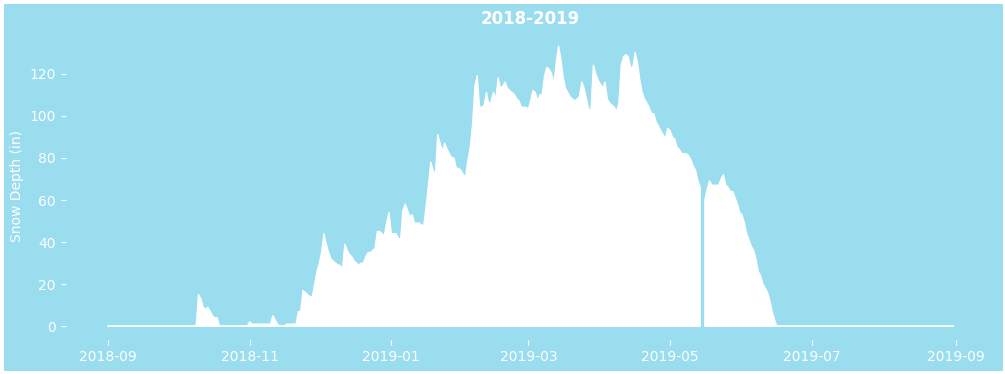

In [7]:
# 視覺化上一步中的資料
import matplotlib.pyplot as plt
blue = '#99ddee'
white = '#ffffff'
fig, ax = plt.subplots(figsize=(12,4), linewidth=5, facecolor=blue)
ax.set_facecolor(blue)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='x', colors=white)
ax.tick_params(axis='y', colors=white)
ax.set_ylabel('Snow Depth (in)', color=white)
ax.set_title('2018-2019', color=white, fontweight='bold')
ax.fill_between(data.index, data, color=white);

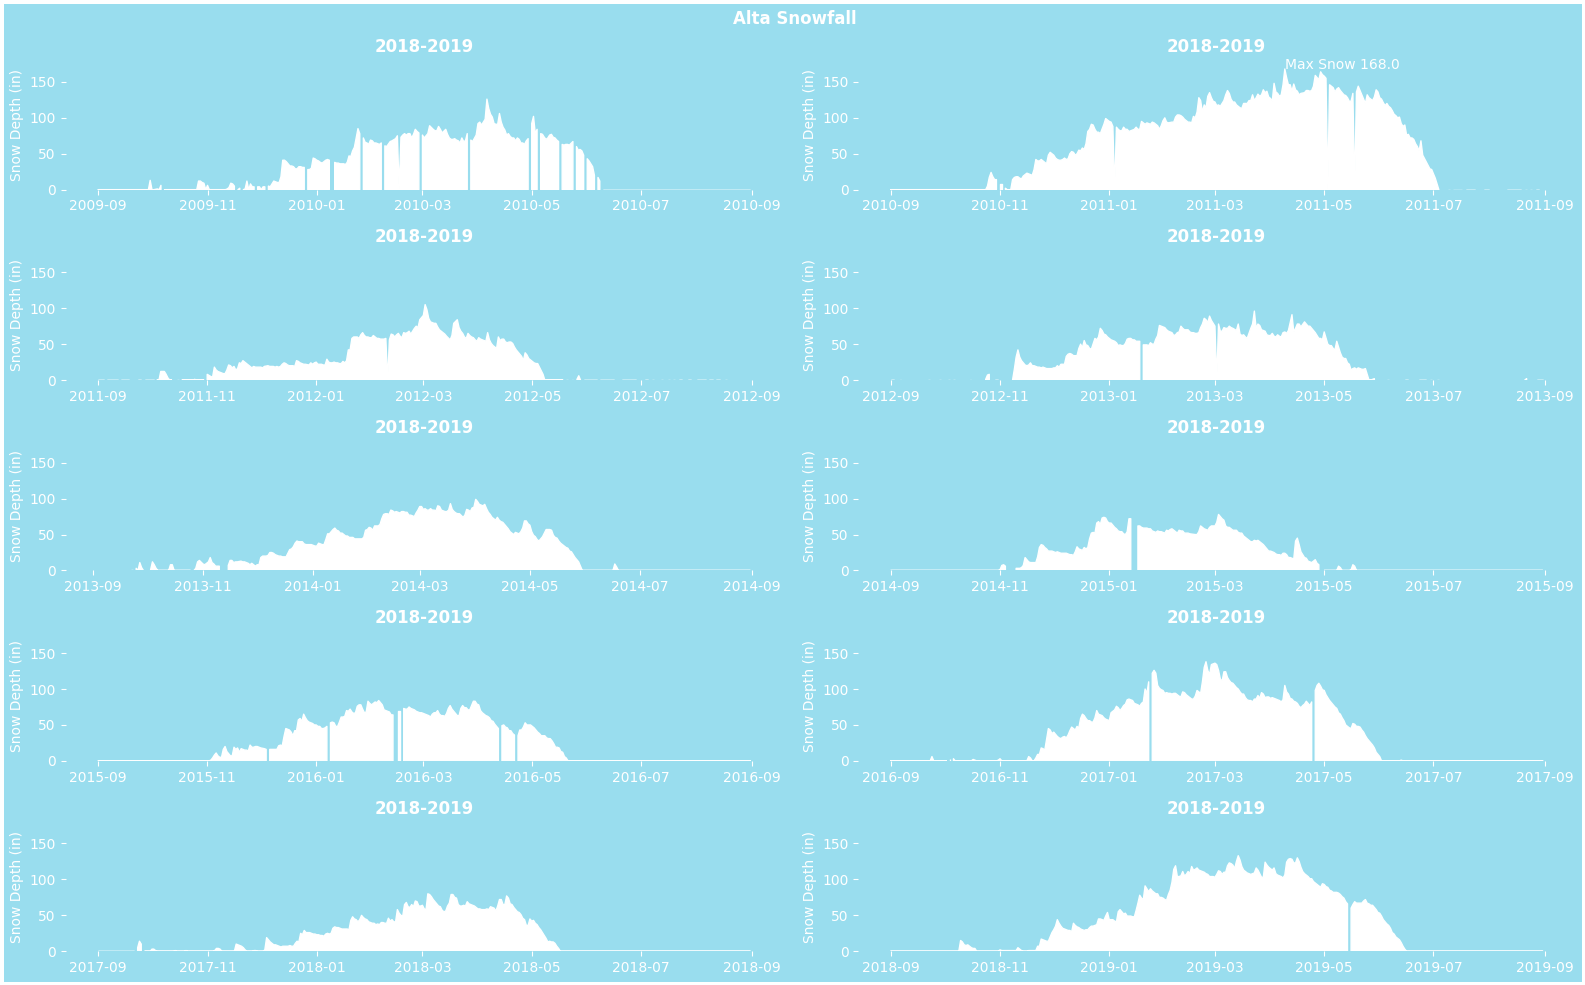

In [ ]:
# 一次呈現10 年期的資料 並顯示最大值
import matplotlib.dates as mdt
blue = '#99ddee'
white = '#ffffff'

def plot_year(ax, data, years):
    ax.set_facecolor(blue)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis='x', colors=white)
    ax.tick_params(axis='y', colors=white)
    ax.set_ylabel('Snow Depth (in)', color=white)
    ax.set_title('2018-2019', color=white, fontweight='bold')
    ax.fill_between(data.index, data, color=white)

years = range(2009,2019)
fig, axs = plt.subplots(ncols=2, nrows=int(len(years)/2),
                        figsize=(16, 10), linewidth=5, facecolor=blue)
axs= axs.flatten()
max_val = None
max_data = None
max_ax = None
for i ,y in enumerate(years):
    ax = axs[i]
    data = (alta.assign(DATE=pd.to_datetime(alta.DATE))
                .set_index('DATE')
                .loc[f'{y}-09':f'{y+1}-08']
                .SNWD)
    if max_val is None or max_val < data.max():
        max_val = data.max()
        max_data = data
        max_ax = ax
    ax.set_ylim(0, 180)
    years = f'{y}-{y+1}'
    plot_year(ax, data, years)
max_ax.annotate(f'Max Snow {max_val}',
                xy=(mdt.date2num(max_data.idxmax()), max_val), color=white)

fig.suptitle('Alta Snowfall', color=white, fontweight='bold')
fig.tight_layout();

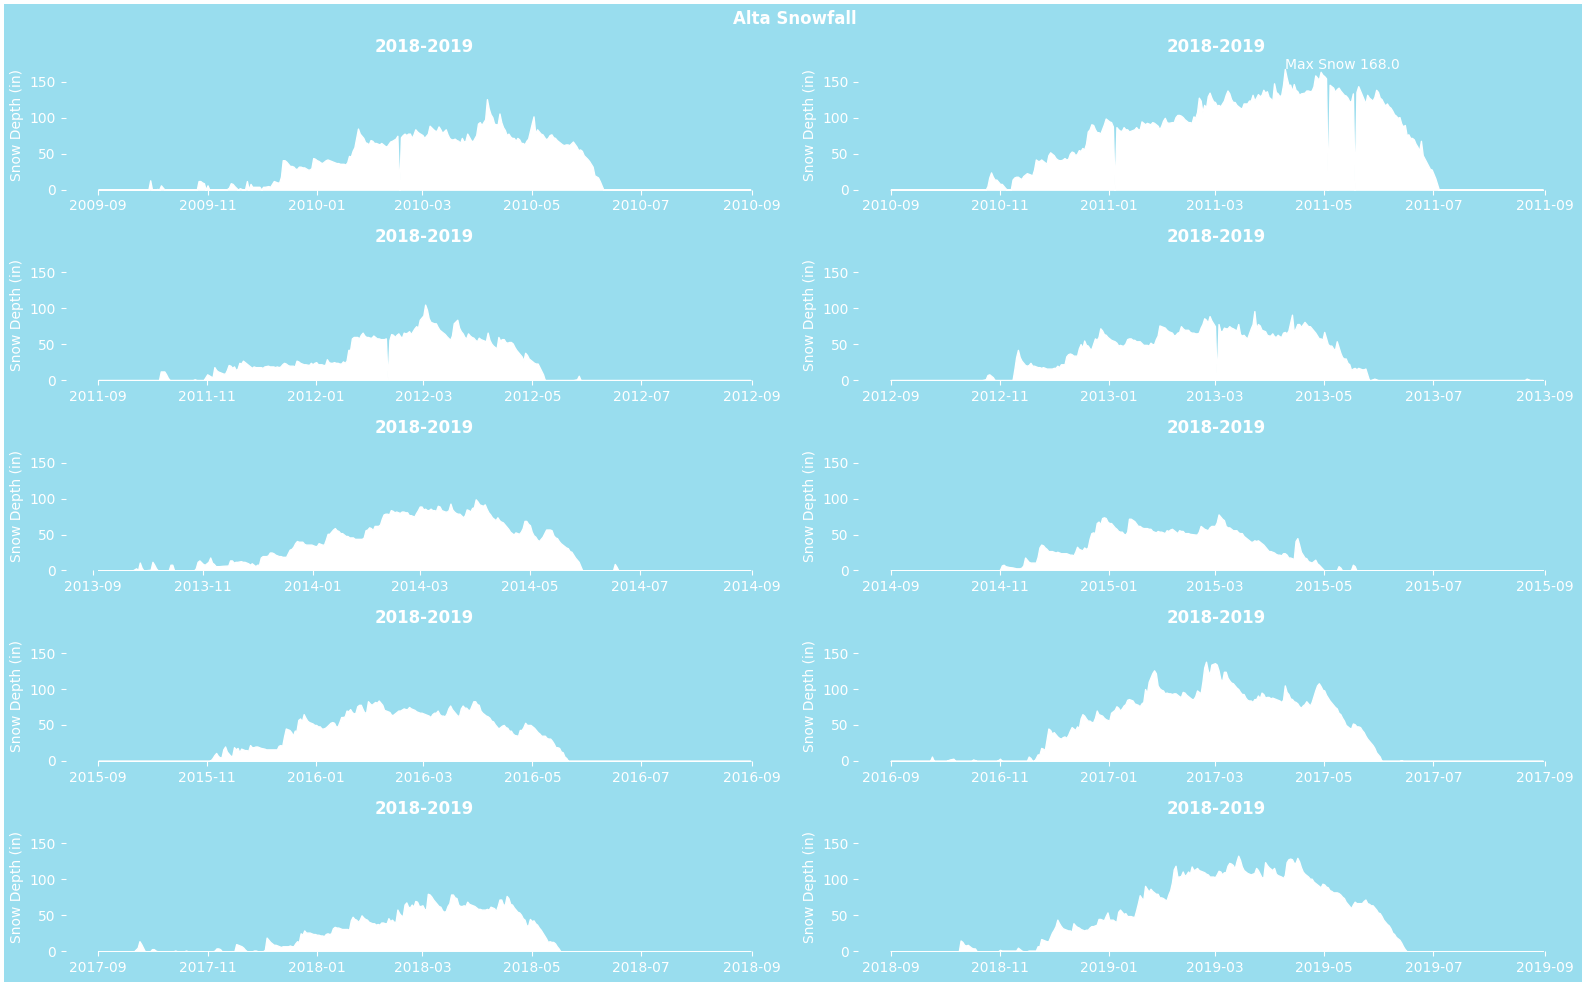

In [9]:
# 用線性內插法interpolate() 處理空隙
years = range(2009,2019)
fig, axs = plt.subplots(ncols=2, nrows=int(len(years)/2),
                        figsize=(16, 10), linewidth=5, facecolor=blue)
axs= axs.flatten()
max_val = None
max_data = None
max_ax = None
for i ,y in enumerate(years):
    ax = axs[i]
    data = (alta.assign(DATE=pd.to_datetime(alta.DATE))
                .set_index('DATE')
                .loc[f'{y}-09':f'{y+1}-08']
                .SNWD
                .interpolate())
    if max_val is None or max_val < data.max():
        max_val = data.max()
        max_data = data
        max_ax = ax
    ax.set_ylim(0, 180)
    years = f'{y}-{y+1}'
    plot_year(ax, data, years)
max_ax.annotate(f'Max Snow {max_val}',
                xy=(mdt.date2num(max_data.idxmax()), max_val), color=white)

fig.suptitle('Alta Snowfall', color=white, fontweight='bold')
fig.tight_layout();

In [10]:
# 檢查資料集正確性
print(alta
        .assign(DATE=pd.to_datetime(alta.DATE))
        .set_index('DATE')
        .SNWD
        .to_frame()
        .assign(next=lambda df_:df_.SNWD.shift(-1),
                snwd_diff=lambda df_:df_.next-df_.SNWD)
        .pipe(lambda df_:df_[df_.snwd_diff.abs() > 50]))

             SNWD   next  snwd_diff
DATE                               
1989-11-27   60.0    0.0      -60.0
2007-02-28   87.0    9.0      -78.0
2008-05-22   62.0    0.0      -62.0
2008-05-23    0.0   66.0       66.0
2009-01-16   76.0    0.0      -76.0
2009-01-17    0.0   70.0       70.0
2009-05-14   52.0    0.0      -52.0
2009-05-15    0.0   51.0       51.0
2009-05-17   55.0    0.0      -55.0
2010-02-15   75.0    0.0      -75.0
2010-02-16    0.0   73.0       73.0
2011-01-03   88.0    0.0      -88.0
2011-01-04    0.0   87.0       87.0
2011-05-02  155.0    0.0     -155.0
2011-05-03    0.0  146.0      146.0
2011-05-17  134.0    0.0     -134.0
2011-05-18    0.0  136.0      136.0
2012-02-09   58.0    0.0      -58.0
2012-02-10    0.0   56.0       56.0
2013-03-01   75.0    0.0      -75.0
2013-03-02    0.0   78.0       78.0


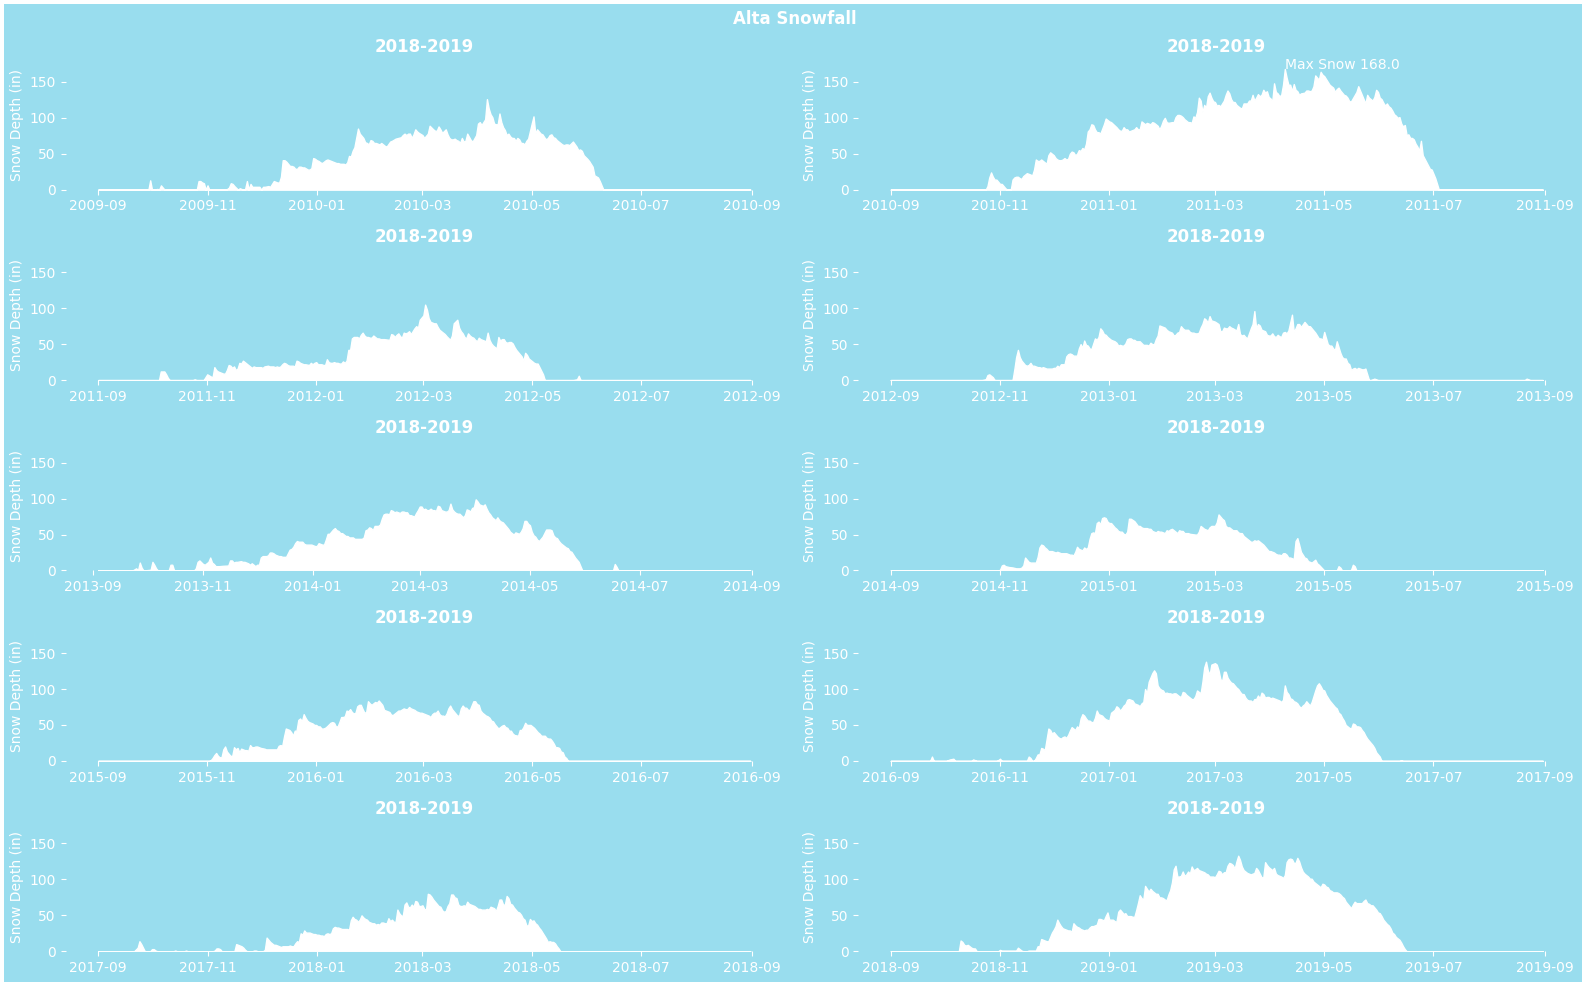

In [12]:
# 新增篩選函式
def fix_gaps(ser, threshold=50):
    mask = (ser
             .to_frame()
             .assign(next=lambda df_:df_.SNWD.shift(-1),
                     snwd_diff=lambda df_:df_.next-df_.SNWD)
             .pipe(lambda df_:df_.snwd_diff.abs() > threshold))
    return ser.where(~mask, np.nan)

years = range(2009,2019)
fig, axs = plt.subplots(ncols=2, nrows=int(len(years)/2),
                        figsize=(16, 10), linewidth=5, facecolor=blue)
axs= axs.flatten()
max_val = None
max_data = None
max_ax = None
for i ,y in enumerate(years):
    ax = axs[i]
    data = (alta.assign(DATE=pd.to_datetime(alta.DATE))
                .set_index('DATE')
                .loc[f'{y}-09':f'{y+1}-08']
                .SNWD
                .pipe(fix_gaps)
                .interpolate())
    if max_val is None or max_val < data.max():
        max_val = data.max()
        max_data = data
        max_ax = ax
    ax.set_ylim(0, 180)
    years = f'{y}-{y+1}'
    plot_year(ax, data, years)
max_ax.annotate(f'Max Snow {max_val}',
                xy=(mdt.date2num(max_data.idxmax()), max_val), color=white)

fig.suptitle('Alta Snowfall', color=white, fontweight='bold')
fig.tight_layout();

## 12.4 用Pandas 繪製基本圖形

In [13]:
# 建立一個簡易資料集
df = pd.DataFrame(index=['Atiya', 'Abbas', 'Cornelia', 'Stephanie', 'Monte'],
                  data= {'Apples':[20, 10, 40, 20, 50],
                         'Oranges':[35, 40, 25, 19 ,33]})
print(df)

           Apples  Oranges
Atiya          20       35
Abbas          10       40
Cornelia       40       25
Stephanie      20       19
Monte          50       33


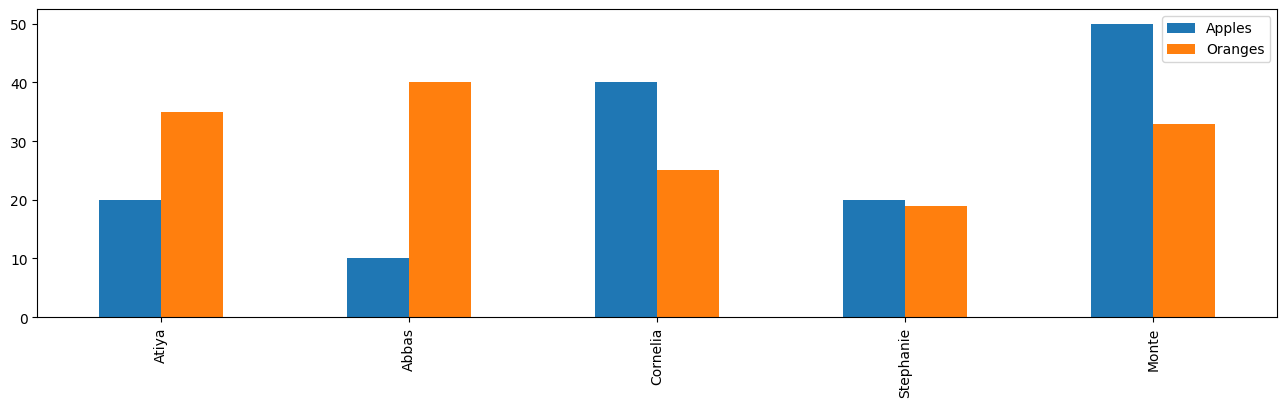

In [14]:
# 使用plot 屬性繪圖
ax = df.plot.bar(figsize=(16,4))

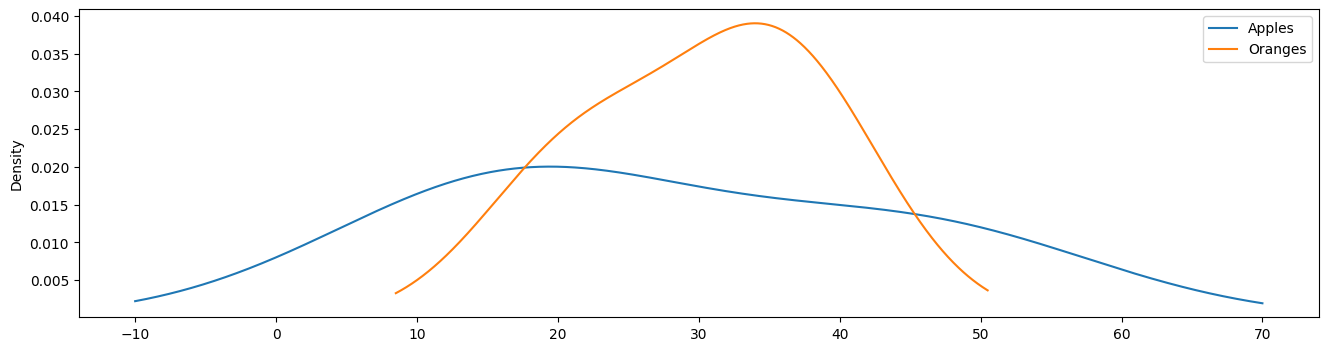

In [15]:
# kde圖
ax = df.plot.kde(figsize=(16, 4))

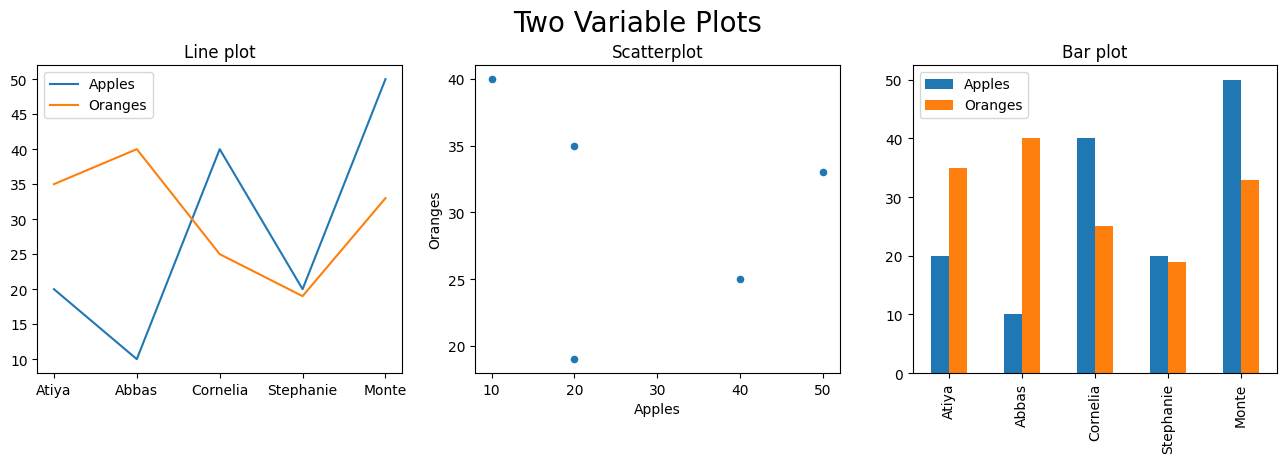

In [18]:
# 一個fig 放多個子圖
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,4))

fig.suptitle('Two Variable Plots', size=20, y=1.02)
df.plot.line(ax=ax1, title='Line plot')

df.plot.scatter(x='Apples', y='Oranges', ax=ax2, title='Scatterplot')
df.plot.bar(ax=ax3, title='Bar plot');

## 12.5 視覺化航班資料集

In [19]:
# 載入資料集
flights = pd.read_csv('../../data/flights.csv')

In [22]:
# 計算延誤班機數
cols = ['DIVERTED', 'CANCELLED', 'DELAYED']
print(flights
    .assign(DELAYED=flights['ARR_DELAY'].ge(15).astype(int),
            ON_TIME=lambda df_:1 - df_[cols].any(axis=1))
    .select_dtypes(int)
    .sum()
)

MONTH          363858
DAY            918447
WEEKDAY        229690
SCHED_DEP    81186009
DIST         51057671
SCHED_ARR    90627495
DIVERTED          137
CANCELLED         881
DELAYED         11685
ON_TIME         45789
dtype: int64


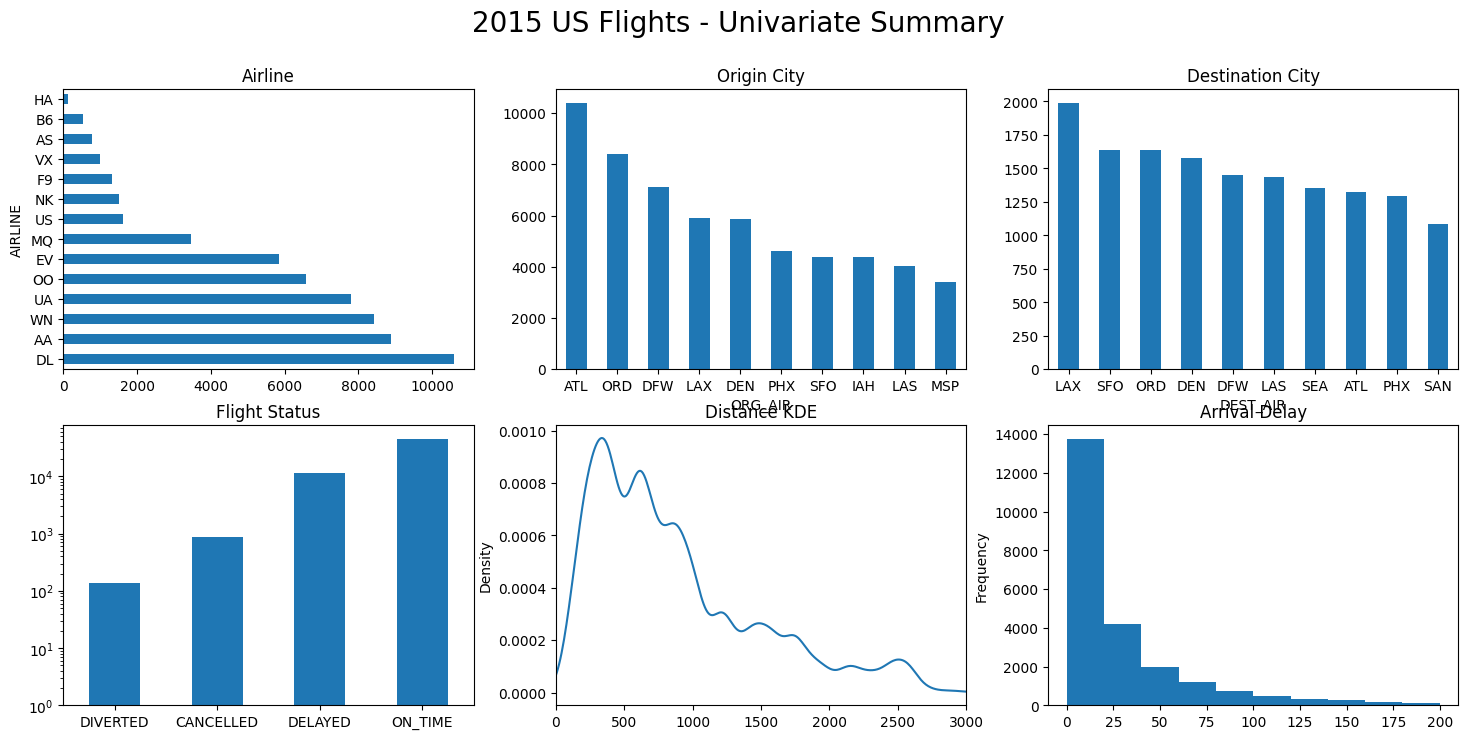

In [23]:
# 為不同欄位繪製圖表
fig, ax_array = plt.subplots(2, 3, figsize=(18,8))
(ax1, ax2, ax3), (ax4, ax5, ax6) = ax_array
fig.suptitle('2015 US Flights - Univariate Summary', size=20)
ac = flights['AIRLINE'].value_counts()
ac.plot.barh(ax=ax1, title='Airline')
(flights
    ['ORG_AIR']
    .value_counts()
    .plot.bar(ax=ax2, rot=0, title='Origin City')
)
(flights
    ['DEST_AIR']
    .value_counts()
    .head(10)
    .plot.bar(ax=ax3, rot=0, title='Destination City')
)
(flights
    .assign(DELAYED=flights['ARR_DELAY'].ge(15).astype(int),
            ON_TIME=lambda df_:1 - df_[cols].any(axis=1))
    [['DIVERTED', 'CANCELLED', 'DELAYED', 'ON_TIME']]
    .sum()
    .plot.bar(ax=ax4, rot=0,
         log=True, title='Flight Status')
)
flights['DIST'].plot.kde(ax=ax5, xlim=(0, 3000), title='Distance KDE')
flights['ARR_DELAY'].plot.hist(ax=ax6, title='Arrival Delay', range=(0,200)
);

In [ ]:
# 做出月日欄位
df_date = (flights
    [['MONTH', 'DAY']]
    .assign(YEAR=2015,
            HOUR=flights['SCHED_DEP'] // 100,
            MINUTE=flights['SCHED_DEP'] % 100)
)
print(df_date)

       MONTH  DAY  YEAR  HOUR  MINUTE
0          1    1  2015    16      25
1          1    1  2015     8      23
2          1    1  2015    13       5
3          1    1  2015    15      55
4          1    1  2015    17      20
...      ...  ...   ...   ...     ...
58487     12   31  2015     5      15
58488     12   31  2015    19      10
58489     12   31  2015    18      46
58490     12   31  2015     5      25
58491     12   31  2015     8      59

[58492 rows x 5 columns]


In [25]:
# 自己建立Timestamp 物件
flight_dep = pd.to_datetime(df_date)
print(flight_dep)

0       2015-01-01 16:25:00
1       2015-01-01 08:23:00
2       2015-01-01 13:05:00
3       2015-01-01 15:55:00
4       2015-01-01 17:20:00
                ...        
58487   2015-12-31 05:15:00
58488   2015-12-31 19:10:00
58489   2015-12-31 18:46:00
58490   2015-12-31 05:25:00
58491   2015-12-31 08:59:00
Length: 58492, dtype: datetime64[ns]


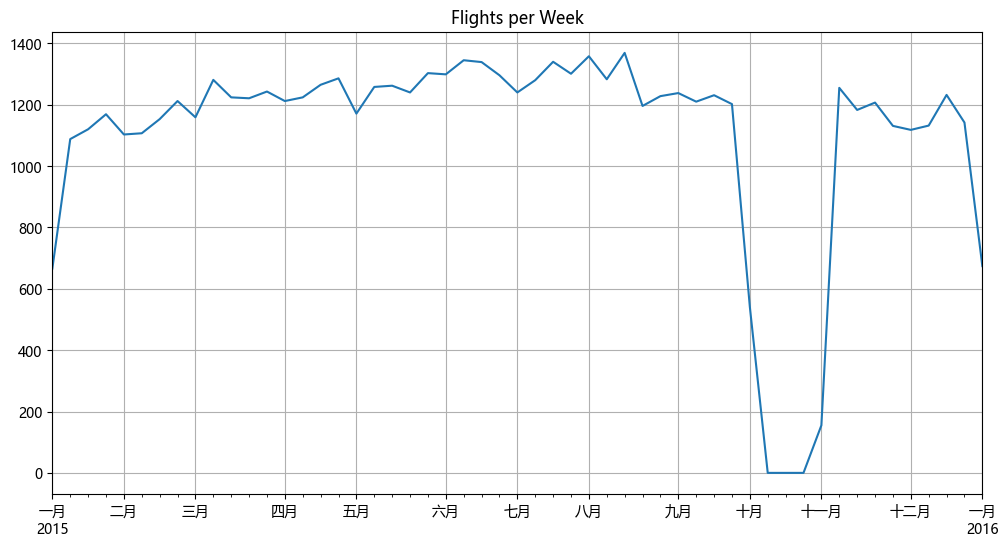

In [34]:
# timestamp 可以拿來建索引
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']

flights.index = flight_dep
fc = flights.resample('W').size()
fc.plot.line(figsize=(12,6), title='Flights per Week', grid=True);

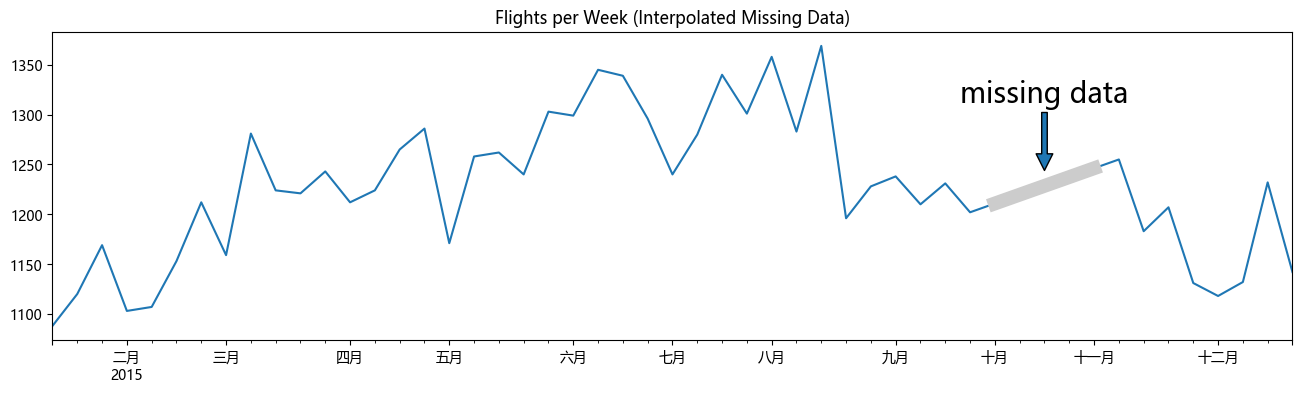

In [36]:
# 建立補缺失值的函式
def interp_lt_n(df_, n=600):
    return (df_
        .where(df_ > n)
        .interpolate(limit_direction='both')
)
fig, ax = plt.subplots(figsize=(16,4))
data = (flights
    .resample('W')
    .size()
)
(data
    .pipe(interp_lt_n)
    .iloc[1:-1]
    .plot.line(ax=ax)
)
mask = data<600
(data
     .pipe(interp_lt_n)[mask]
     .plot.line(color='.8', linewidth=10)
) 
ax.annotate(xy=(.8, .55), xytext=(.8, .77),
            xycoords='axes fraction', text='missing data',
            ha='center', size=20, arrowprops=dict())
ax.set_title('Flights per Week (Interpolated Missing Data)');

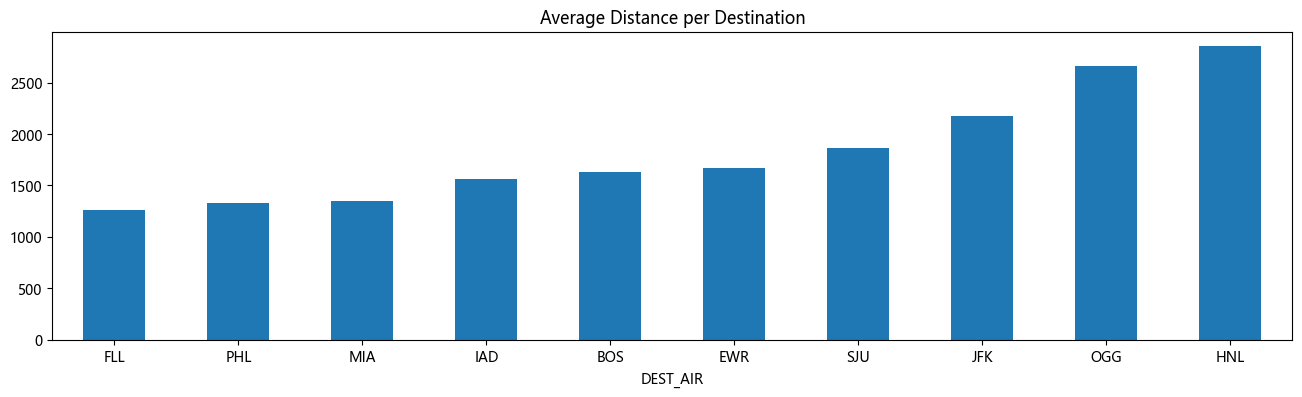

In [37]:
# 找出符合平均飛行距離最長且航班數大於100的10個機場
fig, ax = plt.subplots(figsize=(16,4))
(flights
    .groupby('DEST_AIR')
    ['DIST'] 
    .agg(['mean', 'count']) 
    .query('count > 100') 
    .sort_values('mean') 
    .tail(10) 
    .plot.bar(y='mean', rot=0, legend=False, ax=ax,
              title='Average Distance per Destination')
);

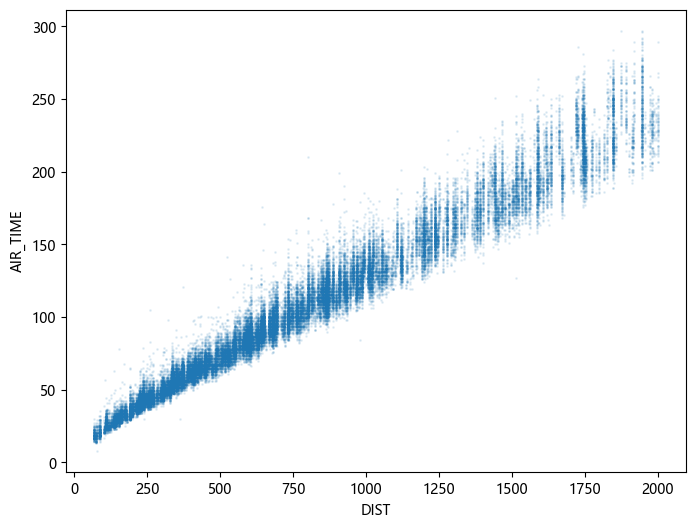

In [38]:
# 分析飛行距離在2000 英里以下的航班的距離與飛行時間關係
fig, ax = plt.subplots(figsize=(8,6))
(flights
    .reset_index(drop=True)
    [['DIST', 'AIR_TIME']] 
    .query('DIST <= 2000')
    .dropna()
    .plot.scatter(x='DIST', y='AIR_TIME', ax=ax, alpha=.1, s=1)
);

In [39]:
# 找關聯性
print(flights[['DIST', 'AIR_TIME']].corr())

             DIST  AIR_TIME
DIST      1.00000   0.98774
AIR_TIME  0.98774   1.00000


In [40]:
# 先把飛行距離分組
print(flights
    .reset_index(drop=True)
    [['DIST', 'AIR_TIME']] 
    .query('DIST <= 2000')
    .dropna()
    .pipe(lambda df_:pd.cut(df_.DIST,
          bins=range(0, 2001, 250)))
    .value_counts()
    .sort_index()
)

DIST
(0, 250]         6529
(250, 500]      12631
(500, 750]      11506
(750, 1000]      8832
(1000, 1250]     5071
(1250, 1500]     3198
(1500, 1750]     3885
(1750, 2000]     1815
Name: count, dtype: int64


In [41]:
# 標準化
zscore = lambda x: (x - x.mean()) / x.std()
short = (flights
    [['DIST', 'AIR_TIME']] 
    .query('DIST <= 2000')
    .dropna()
    .reset_index(drop=True)    
    .assign(BIN=lambda df_:pd.cut(df_.DIST, bins=range(0, 2001, 250)))
)

scores = (short
    .groupby('BIN')
    ['AIR_TIME']
    .transform(zscore)
)  
print(short.assign(SCORE=scores))

       DIST  AIR_TIME           BIN     SCORE
0       590      94.0    (500, 750]  0.490966
1      1452     154.0  (1250, 1500] -1.267551
2       641      85.0    (500, 750] -0.296749
3      1192     126.0  (1000, 1250] -1.211020
4      1363     166.0  (1250, 1500] -0.521999
...     ...       ...           ...       ...
53462  1464     166.0  (1250, 1500] -0.521999
53463   414      71.0    (250, 500]  1.376879
53464   262      46.0    (250, 500] -1.255719
53465   907     124.0   (750, 1000]  0.495005
53466   522      73.0    (500, 750] -1.347036

[53467 rows x 4 columns]


C:\Users\coffi\AppData\Local\Temp\ipykernel_1288\872321005.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('BIN')


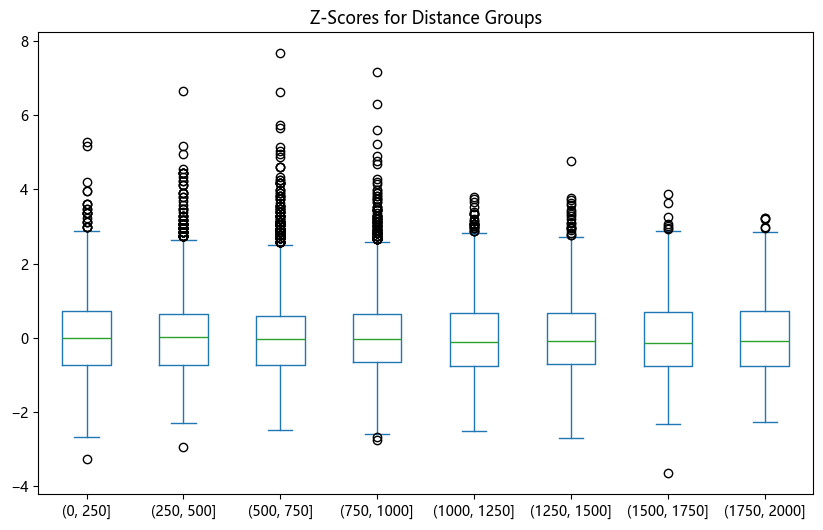

In [42]:
# 用箱型圖找離群值
fig, ax = plt.subplots(figsize=(10,6))    
(short.assign(SCORE=scores)
      .pivot(columns='BIN')
      ['SCORE']
      .plot.box(ax=ax)
)
ax.set_title('Z-Scores for Distance Groups');

In [43]:
# 抓出離群值
mask = (short
    .assign(SCORE=scores)
    .pipe(lambda df_:df_.SCORE.abs() >6)
)

outliers = (flights
    [['DIST', 'AIR_TIME']] 
    .query('DIST <= 2000')
    .dropna()
    .reset_index(drop=True)
    [mask]
    .assign(PLOT_NUM=lambda df_:range(1, len(df_)+1))
)

print(outliers)

       DIST  AIR_TIME  PLOT_NUM
14972   373     121.0         1
22507   907     199.0         2
40768   643     176.0         3
50141   651     164.0         4
52699   802     210.0         5


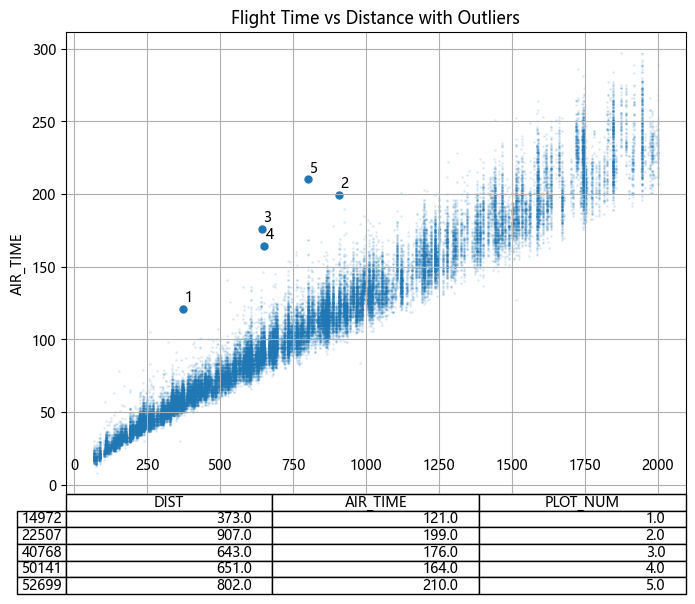

In [44]:
# 標示出離群值 以及新增離群值表格
fig, ax = plt.subplots(figsize=(8,6))
(short
    .assign(SCORE=scores)
    .plot.scatter(x='DIST', y='AIR_TIME',
                  alpha=.1, s=1, ax=ax,
                  table=outliers)
)
outliers.plot.scatter(x='DIST', y='AIR_TIME', s=25, ax=ax, grid=True)
outs = outliers[['AIR_TIME', 'DIST', 'PLOT_NUM']]
for t, d, n in outs.itertuples(index=False):
    ax.text(d + 5, t + 5, str(n))
plt.setp(ax.get_xticklabels(), y=.1)
plt.setp(ax.get_xticklines(), visible=False)
ax.set_xlabel('')
ax.set_title('Flight Time vs Distance with Outliers');

## 12.6 使用堆疊面積圖找出趨勢

In [45]:
# 載入資料集
meetup = pd.read_csv('../../data/meetup_groups.csv',
                     parse_dates=['join_date'],
                     index_col='join_date')
print(meetup)

                                  group     city state country
join_date                                                     
2016-11-18     houston machine learning  Houston    TX      us
2017-05-09     houston machine learning  Houston    TX      us
2016-12-30     houston machine learning  Houston    TX      us
2016-07-18     houston machine learning  Houston    TX      us
2017-05-25     houston machine learning  Houston    TX      us
...                                 ...      ...   ...     ...
2017-10-07  houston data visualization   Houston    TX      us
2017-06-24  houston data visualization   Houston    TX      us
2015-10-05  houston data visualization   Houston    TX      us
2016-11-04  houston data visualization   Houston    TX      us
2016-08-02  houston data visualization   Houston    TX      us

[7671 rows x 4 columns]


In [46]:
# 取得不同群組中 每周新註冊的會員數
print(meetup.groupby([pd.Grouper(freq='W'), 'group']) 
       .size())

join_date   group                       
2010-11-07  houstonr                         5
2010-11-14  houstonr                        11
2010-11-21  houstonr                         2
2010-12-05  houstonr                         1
2011-01-16  houstonr                         2
                                            ..
2017-10-15  houston data science            14
            houston data visualization      13
            houston energy data science      9
            houston machine learning        11
            houstonr                         2
Length: 763, dtype: int64


In [47]:
# 整理欄位
print(meetup
    .groupby([pd.Grouper(freq='W'), 'group']) 
    .size()
    .unstack('group', fill_value=0)
)

group       houston data science  houston data visualization   \
join_date                                                       
2010-11-07                     0                            0   
2010-11-14                     0                            0   
2010-11-21                     0                            0   
2010-12-05                     0                            0   
2011-01-16                     0                            0   
...                          ...                          ...   
2017-09-17                    16                            2   
2017-09-24                    19                            4   
2017-10-01                    20                            6   
2017-10-08                    22                           10   
2017-10-15                    14                           13   

group       houston energy data science   houston machine learning  houstonr  
join_date                                                                  

In [48]:
# 用cumsum 計算累積數量
print(meetup
    .groupby([pd.Grouper(freq='W'), 'group']) 
    .size()
    .unstack('group', fill_value=0)
    .cumsum()
)

group       houston data science  houston data visualization   \
join_date                                                       
2010-11-07                     0                            0   
2010-11-14                     0                            0   
2010-11-21                     0                            0   
2010-12-05                     0                            0   
2011-01-16                     0                            0   
...                          ...                          ...   
2017-09-17                  2105                         1708   
2017-09-24                  2124                         1712   
2017-10-01                  2144                         1718   
2017-10-08                  2166                         1728   
2017-10-15                  2180                         1741   

group       houston energy data science   houston machine learning  houstonr  
join_date                                                                  

In [49]:
# 轉換為百分比
print(meetup
    .groupby([pd.Grouper(freq='W'), 'group']) 
    .size()
    .unstack('group', fill_value=0)
    .cumsum()
    .pipe(lambda df_: df_.div(
          df_.sum(axis='columns'), axis='index'))
)

group       houston data science  houston data visualization   \
join_date                                                       
2010-11-07              0.000000                     0.000000   
2010-11-14              0.000000                     0.000000   
2010-11-21              0.000000                     0.000000   
2010-12-05              0.000000                     0.000000   
2011-01-16              0.000000                     0.000000   
...                          ...                          ...   
2017-09-17              0.282058                     0.228862   
2017-09-24              0.282409                     0.227629   
2017-10-01              0.283074                     0.226829   
2017-10-08              0.284177                     0.226712   
2017-10-15              0.284187                     0.226959   

group       houston energy data science   houston machine learning  houstonr  
join_date                                                                  

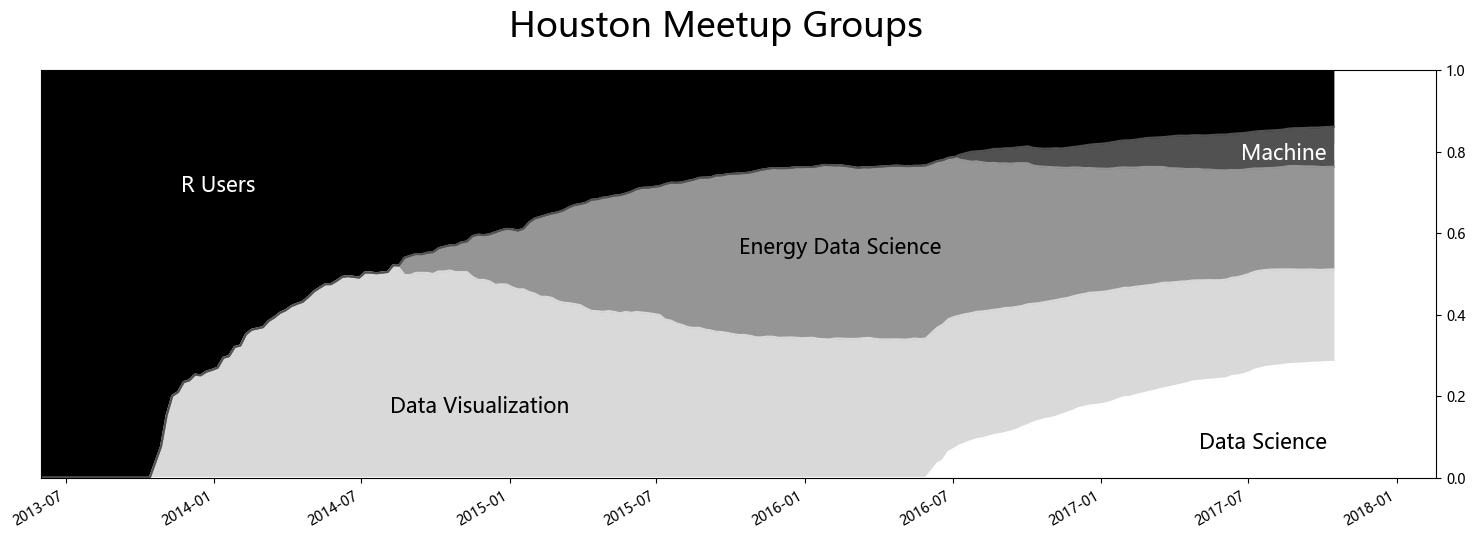

In [51]:
# 畫堆疊圖
fig, ax = plt.subplots(figsize=(18,6))    
(meetup
    .groupby([pd.Grouper(freq='W'), 'group']) 
    .size()
    .unstack('group', fill_value=0)
    .cumsum()
    .pipe(lambda df_: df_.div(
          df_.sum(axis='columns'), axis='index'))
    .plot.area(ax=ax,
          cmap='Greys', xlim=('2013-6', None),
          ylim=(0, 1), legend=False)
)
ax.figure.suptitle('Houston Meetup Groups', size=25)
ax.set_xlabel('')
ax.yaxis.tick_right()
kwargs = {'xycoords':'axes fraction', 'size':15}
ax.annotate(xy=(.1, .7), text='R Users', color='w', **kwargs)
ax.annotate(xy=(.25, .16), text='Data Visualization', color='k', **kwargs)
ax.annotate(xy=(.5, .55), text='Energy Data Science', color='k', **kwargs)
ax.annotate(xy=(.83, .07), text='Data Science', color='k', **kwargs)
ax.annotate(xy=(.86, .78), text='Machine Learning', color='w', **kwargs);

## 12.7 了解Seaborn 和 Pandas 之間的區別

In [ ]:
# 載入資料集
employee = pd.read_csv('../../data/employee.csv',
                       parse_dates=['HIRE_DATE', 'JOB_DATE'])
print(employee)

      UNIQUE_ID               POSITION_TITLE                     DEPARTMENT  \
0             0  ASSISTANT DIRECTOR (EX LVL)    Municipal Courts Department   
1             1            LIBRARY ASSISTANT                        Library   
2             2               POLICE OFFICER  Houston Police Department-HPD   
3             3            ENGINEER/OPERATOR  Houston Fire Department (HFD)   
4             4                  ELECTRICIAN    General Services Department   
...         ...                          ...                            ...   
1995       1995               POLICE OFFICER  Houston Police Department-HPD   
1996       1996       COMMUNICATIONS CAPTAIN  Houston Fire Department (HFD)   
1997       1997               POLICE OFFICER  Houston Police Department-HPD   
1998       1998               POLICE OFFICER  Houston Police Department-HPD   
1999       1999                 FIRE FIGHTER  Houston Fire Department (HFD)   

      BASE_SALARY                       RACE EMPLOY

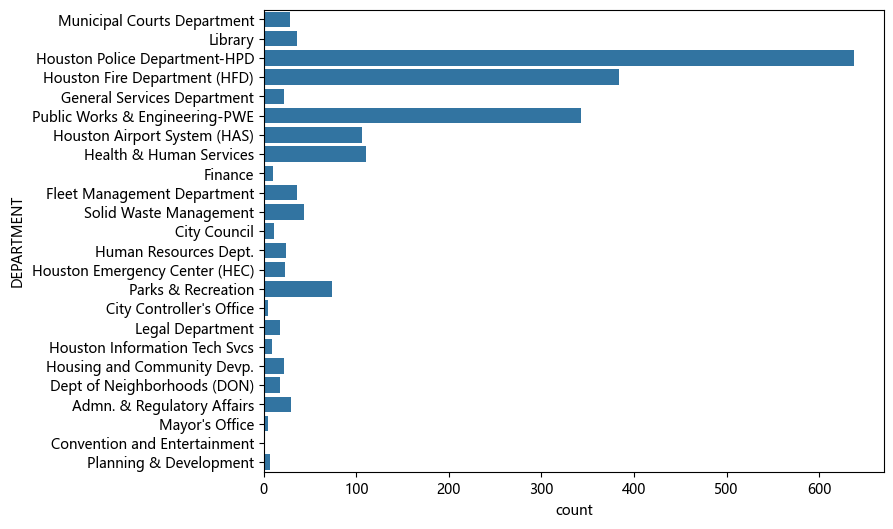

In [54]:
# seaborn 會自動聚合
import seaborn as sns

fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(y='DEPARTMENT', data=employee, ax=ax);

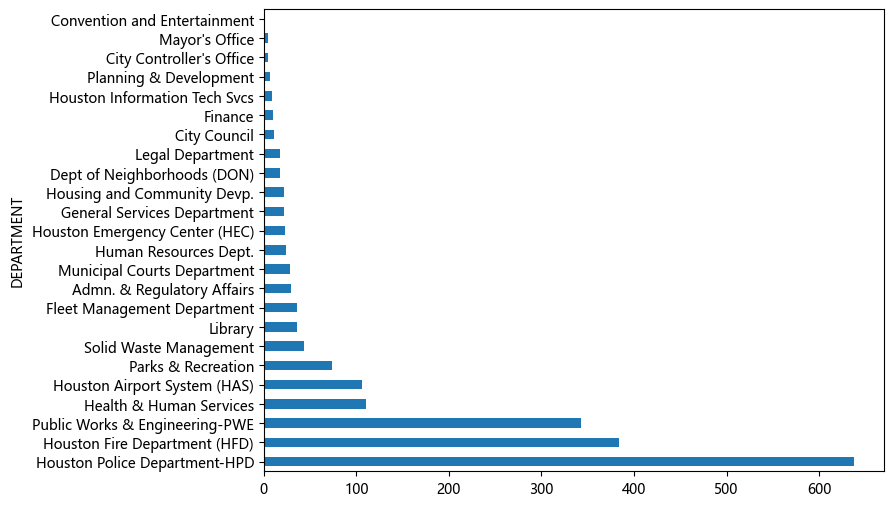

In [56]:
# pandas 需要先整理好資料
fig, ax = plt.subplots(figsize=(8, 6))
(employee
    ['DEPARTMENT']
    .value_counts()
    .plot.barh(ax=ax)
);

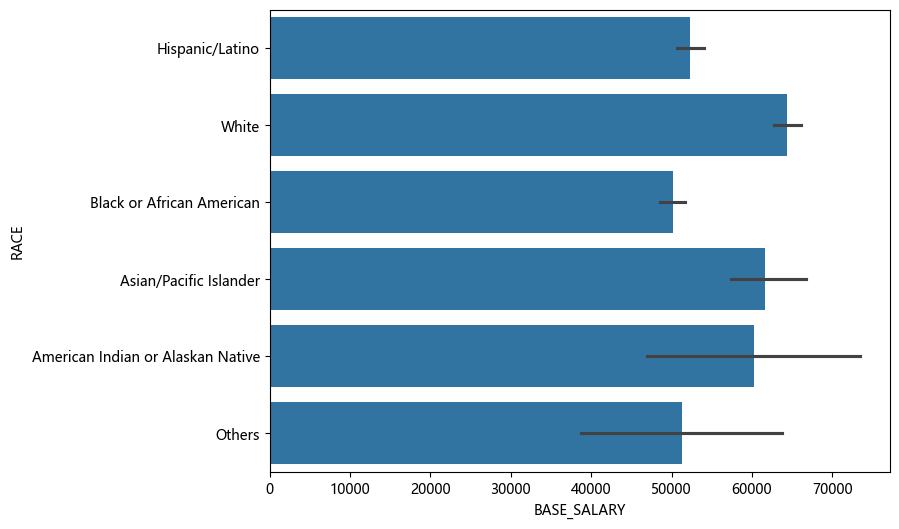

In [58]:
# seaborn 整理不同種族的平均薪資
fig, ax = plt.subplots(figsize=(8, 6))    
sns.barplot(y='RACE', x='BASE_SALARY', data=employee, ax=ax);

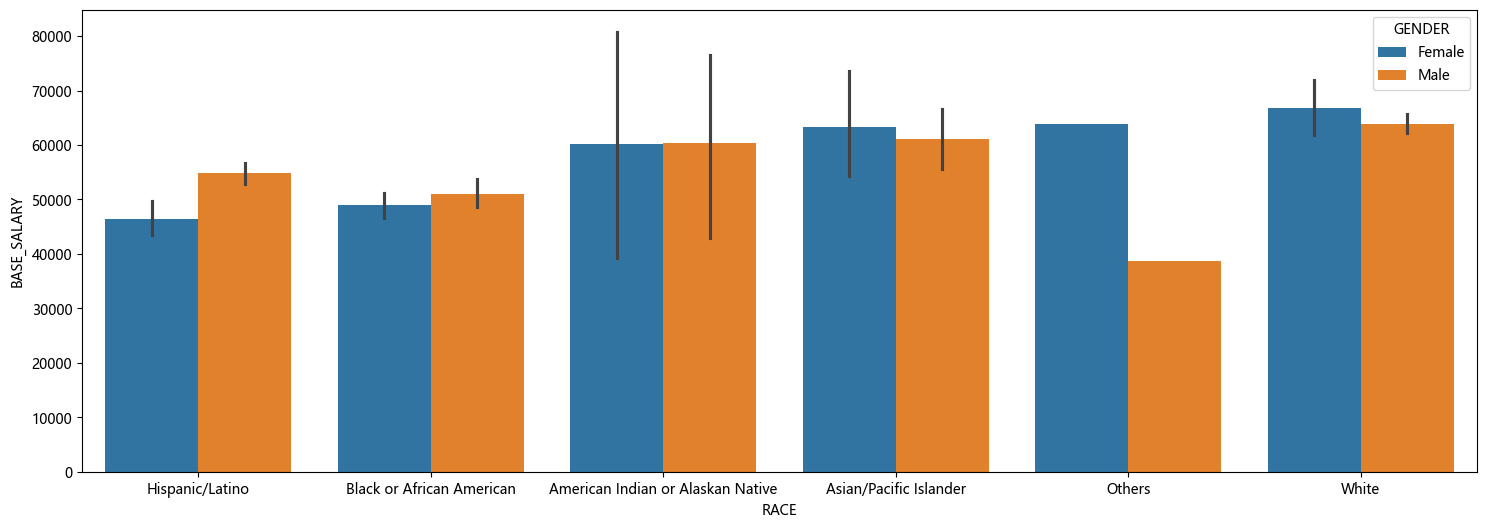

In [60]:
# 比較種族與性別的平均薪水
fig, ax = plt.subplots(figsize=(18, 6))        
sns.barplot(x='RACE', y='BASE_SALARY', hue='GENDER',
            ax=ax, data=employee,
            order=['Hispanic/Latino', 
                   'Black or African American',
                   'American Indian or Alaskan Native',
                   'Asian/Pacific Islander', 'Others',
                   'White']);

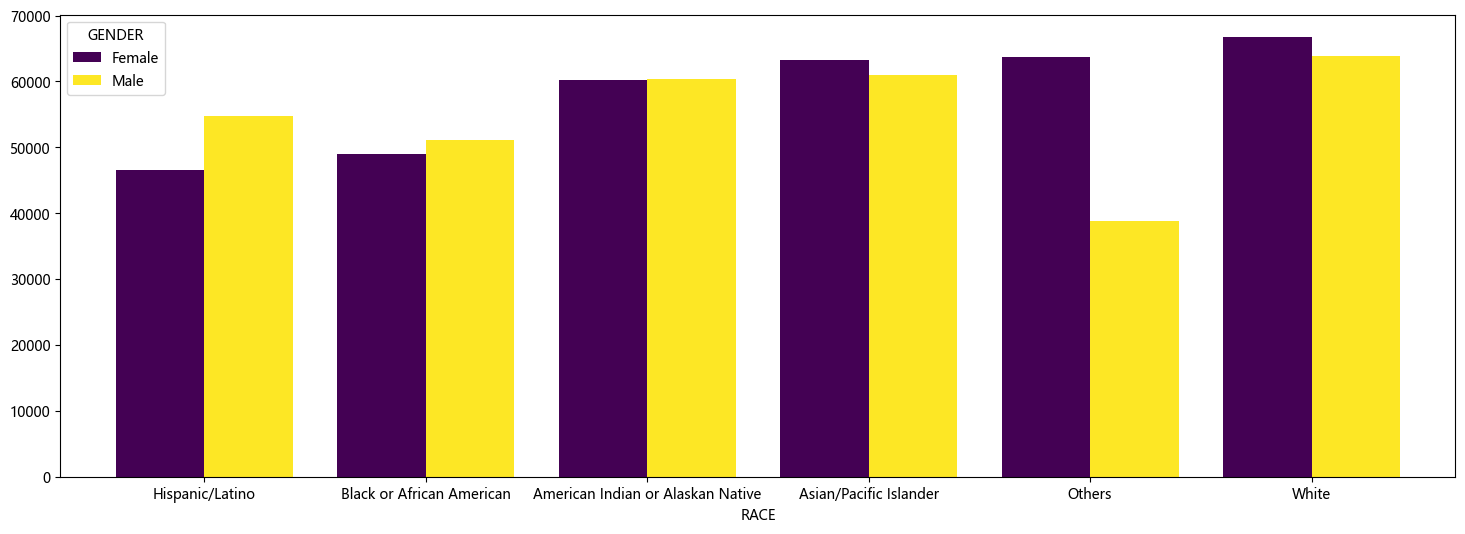

In [61]:
# pandas 的作法
fig, ax = plt.subplots(figsize=(18, 6))            
(employee
    .groupby(['RACE', 'GENDER'], sort=False) 
    ['BASE_SALARY']
    .mean()
    .unstack('GENDER')
    .sort_values('Female')
    .plot.bar(rot=0, ax=ax, width=.8, cmap='viridis')
);

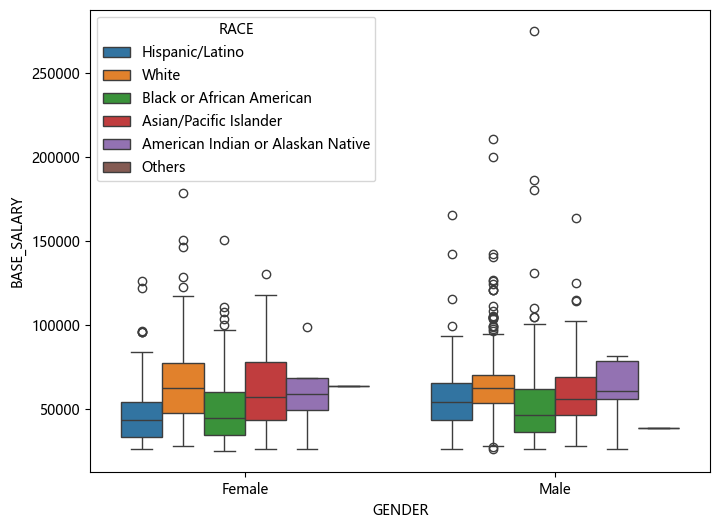

In [62]:
# 用seaborn 畫種族與性別的平均薪水分組的箱型圖
fig, ax = plt.subplots(figsize=(8, 6))            
sns.boxplot(x='GENDER', y='BASE_SALARY', data=employee,
            hue='RACE', ax=ax);

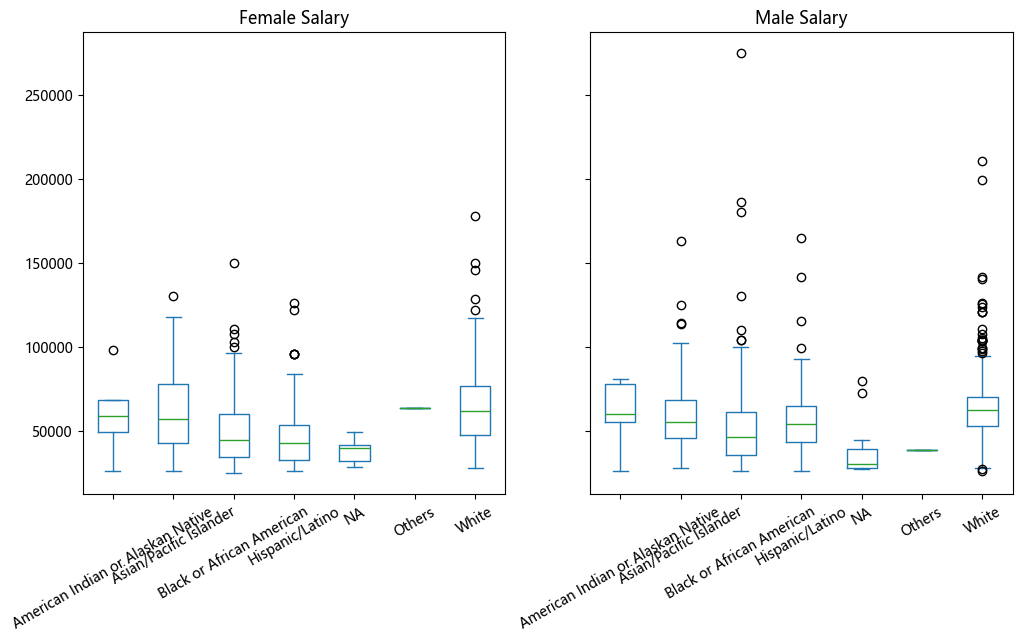

In [63]:
# pandas 基本上只能分成兩張圖
fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
for g, ax in zip(['Female', 'Male'], axs):
    (employee
        .query('GENDER == @g')
        .assign(RACE=lambda df_:df_.RACE.fillna('NA'))
        .pivot(columns='RACE')
        ['BASE_SALARY']
        .plot.box(ax=ax, rot=30)
    )
    ax.set_title(g + ' Salary')
    ax.set_xlabel('');

## 12.8 使用Seaborn 進行多變量分析

In [65]:
# 載入資料集 並新增年資欄位
emp = pd.read_csv('../../data/employee.csv',
    parse_dates=['HIRE_DATE', 'JOB_DATE'])

def yrs_exp(df_):
    days_hired = pd.to_datetime('12-1-2016') - df_.HIRE_DATE
    return days_hired.dt.days / 365.25

emp = emp.assign(YEARS_EXPERIENCE=yrs_exp)
print(emp[['HIRE_DATE', 'YEARS_EXPERIENCE']])

      HIRE_DATE  YEARS_EXPERIENCE
0    2006-06-12         10.472279
1    2000-07-19         16.369610
2    2015-02-03          1.826146
3    1982-02-08         34.811773
4    1989-06-19         27.452430
...         ...               ...
1995 2014-06-09          2.480493
1996 2003-09-02         13.248460
1997 2014-10-13          2.135524
1998 2009-01-20          7.863107
1999 2009-01-12          7.885010

[2000 rows x 2 columns]


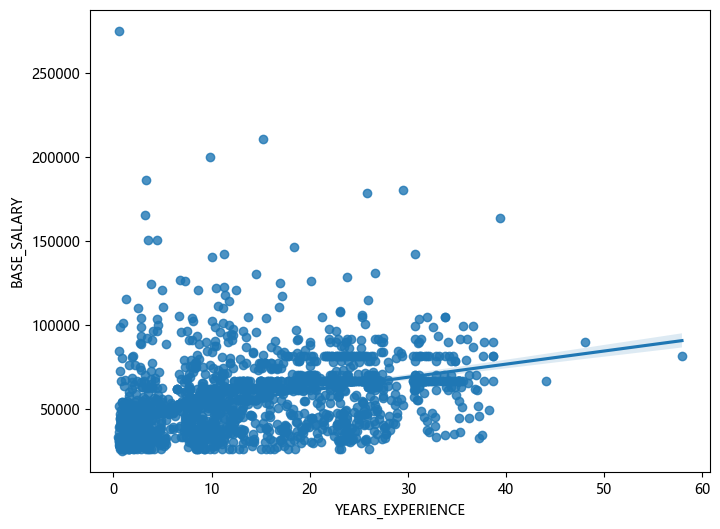

In [ ]:
# Seaborn 可以用迴歸表示年資與薪水關係
fig, ax = plt.subplots(figsize=(8, 6))        
sns.regplot(x='YEARS_EXPERIENCE', y='BASE_SALARY', data=emp, ax=ax);

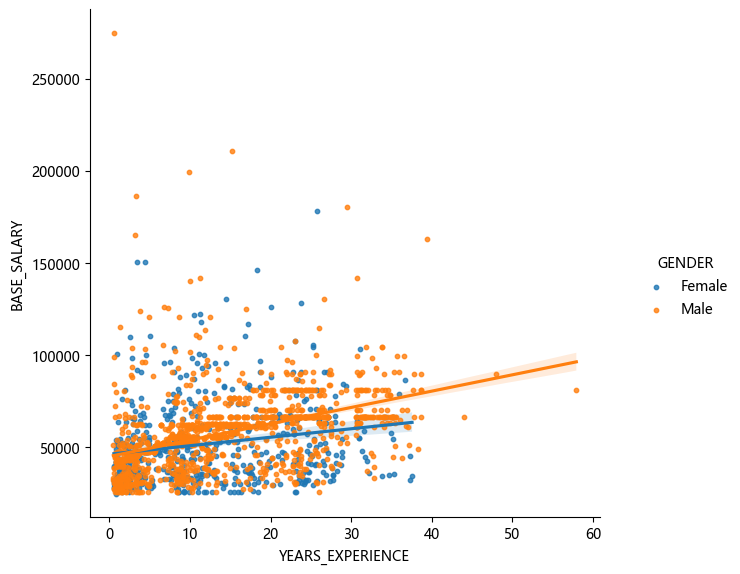

In [67]:
# 可以多個迴歸線 但要用lmplot
grid = sns.lmplot(x='YEARS_EXPERIENCE', y='BASE_SALARY', 
                  hue='GENDER',
                  scatter_kws={'s':10}, data=emp)
grid.fig.set_size_inches(8, 6);

c:\Users\coffi\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\regression.py:598: UserWarning: sharex is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


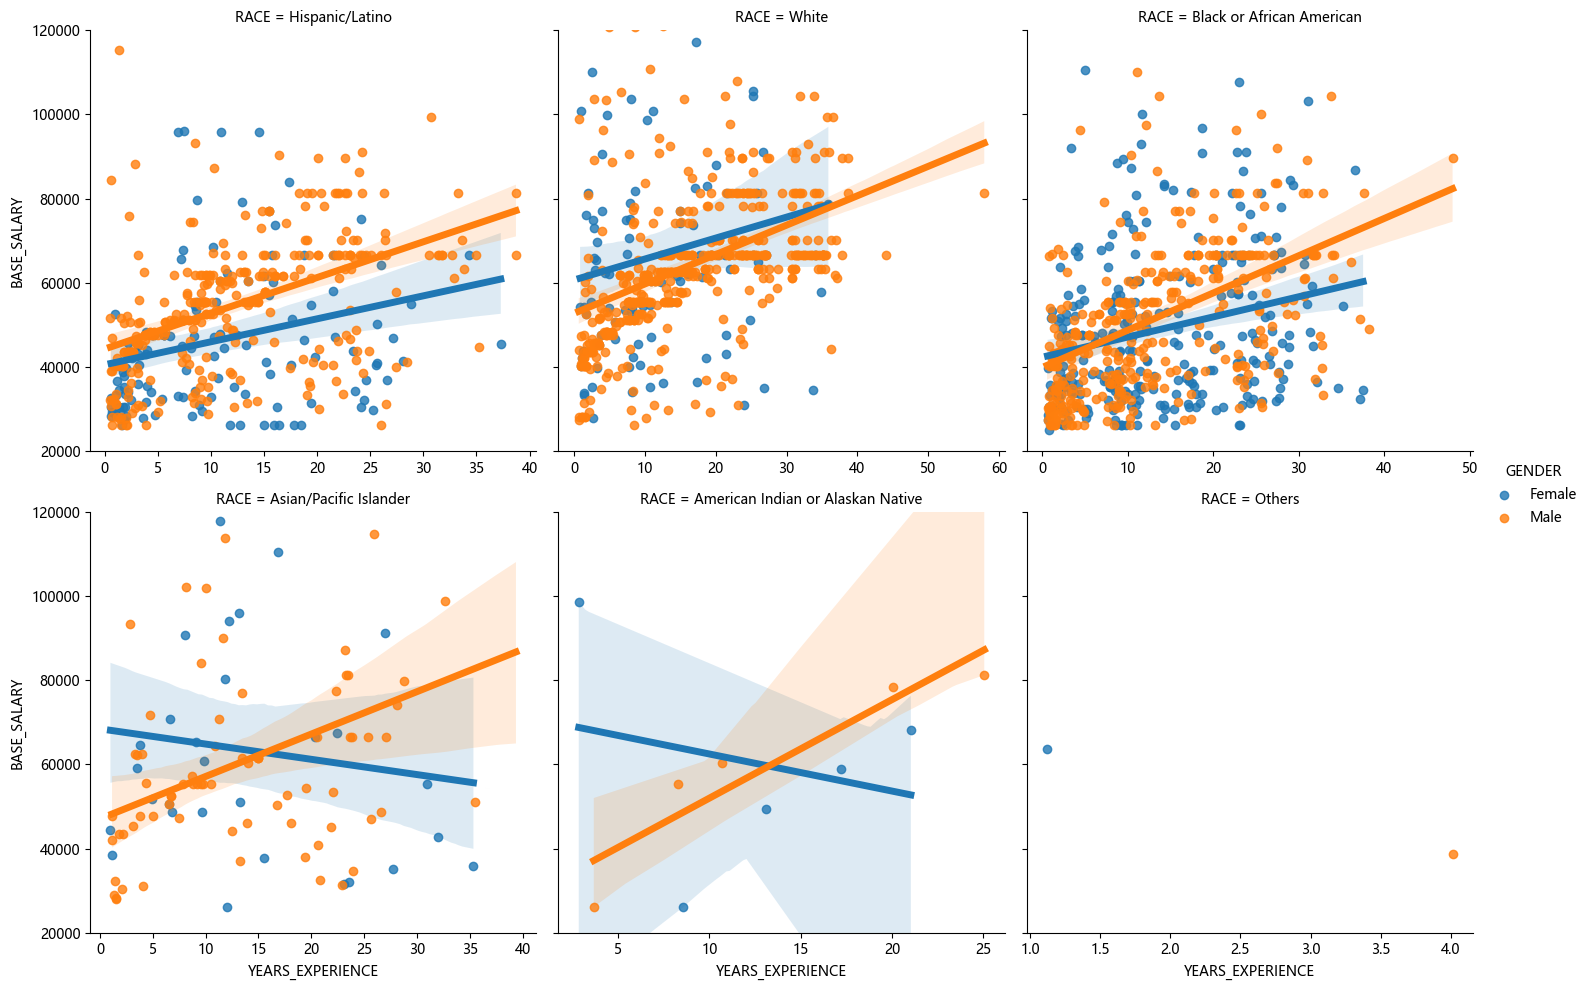

In [68]:
# 切分不同種族
grid = sns.lmplot(x='YEARS_EXPERIENCE', y='BASE_SALARY',
                  hue='GENDER', col='RACE', col_wrap=3,
                  sharex=False,
                  line_kws = {'linewidth':5},
                  data=emp)
grid.set(ylim=(20000, 120000));

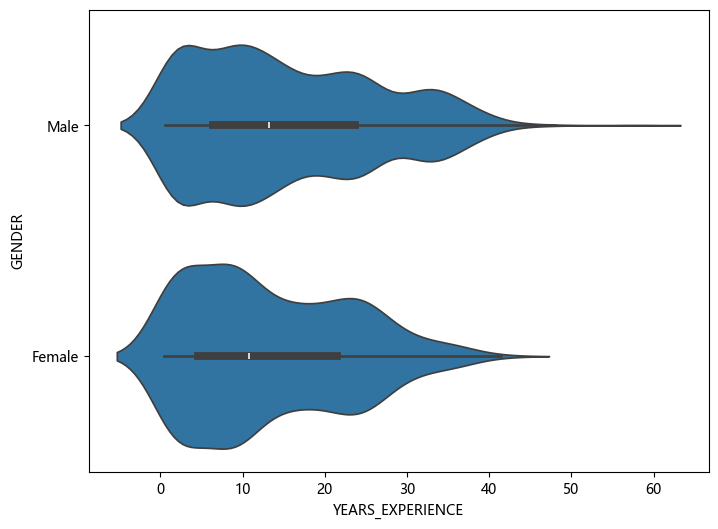

In [69]:
# 分類特徵也可以做類似的分析
# 最常出現的兩個部門
deps = emp['DEPARTMENT'].value_counts().index[:2]

# 最常出現的三個種族
races = emp['RACE'].value_counts().index[:3]

is_dep = emp['DEPARTMENT'].isin(deps)
is_race = emp['RACE'].isin(races)    
emp2 = (emp
    [is_dep & is_race]
    .assign(DEPARTMENT=lambda df_:
            df_['DEPARTMENT'].str.extract('(HPD|HFD)', expand=True))
)

# 畫小提琴圖
common_depts = (emp.groupby('DEPARTMENT') 
                   .filter(lambda group: len(group) > 50))

fig, ax = plt.subplots(figsize=(8, 6))   
sns.violinplot(x='YEARS_EXPERIENCE', y='GENDER', data=common_depts);

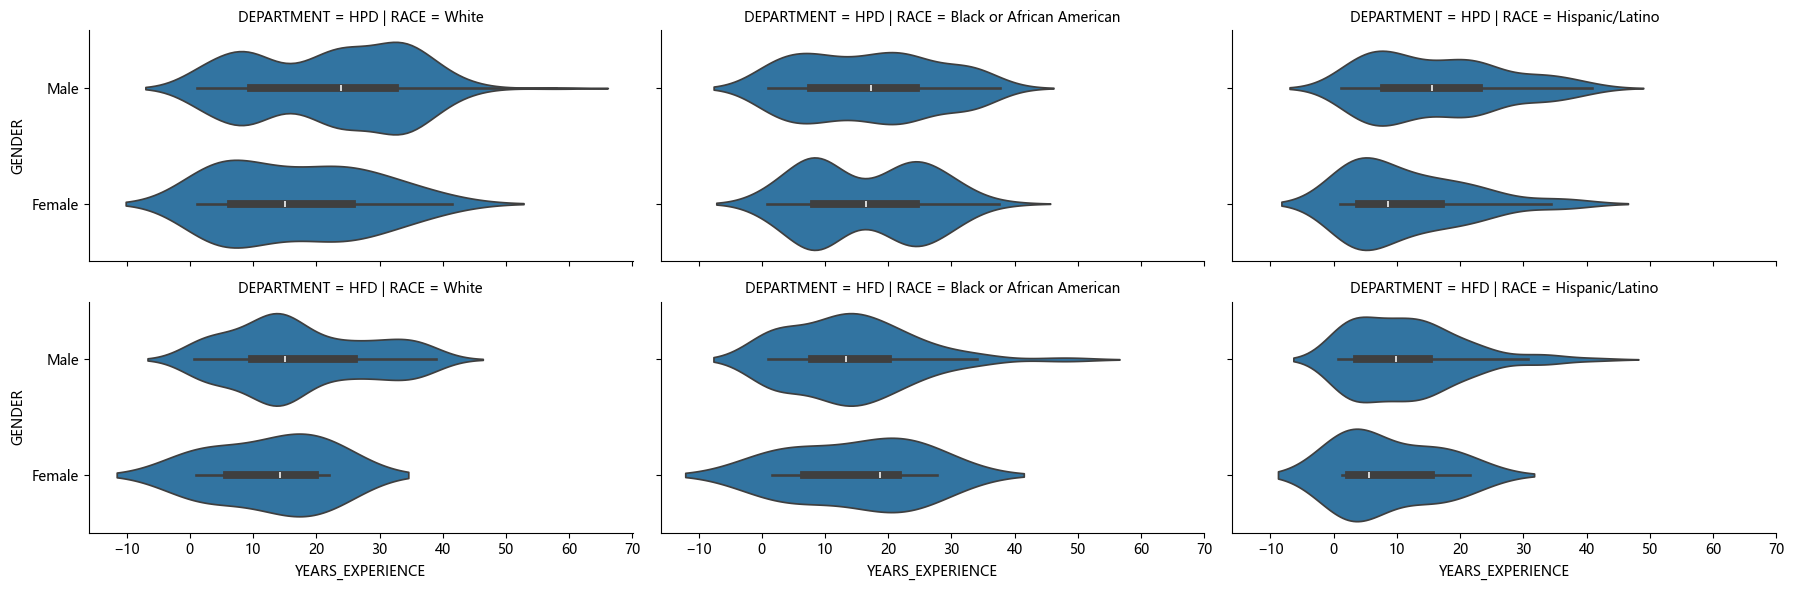

In [70]:
# 為每個種族與部門的組合畫小提琴圖
grid = sns.catplot(x='YEARS_EXPERIENCE', y='GENDER',
                   col='RACE', row='DEPARTMENT',
                   height=3, aspect=2,
                   data=emp2, kind='violin')